One nice aspect of the HealpixSlicer is that it can support lots of coordinate systems, and the metrics can be pulled out and visualized with the standard healpy tools as well

In [3]:
import matplotlib

%matplotlib inline
import numpy as np
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="large"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,8)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points   Start

In [5]:
runName = '/Users/dagoret/DATA/Cadence/baseline2018a'
opsdb = db.OpsimDatabase(runName + '.db')
outDir = 'coordinates'

In [6]:
# let's just look at the number of observations in r-band after 2 years with default kwargs
sql = 'filter="r" and night < %i' % int((365.25*2))
metric = metrics.CountMetric(col='observationStartMJD')
slicer = slicers.HealpixSlicer()

# Set the max on the color bar so DD fields don't saturate
plotDict = {'colorMax': 75}
# only plot the sky maps for now
plotFuncs = [plots.HealpixSkyMap()]
bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['fieldDec', 'observationStartMJD', 'fieldRA']
Found 83867 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
Plotting complete.


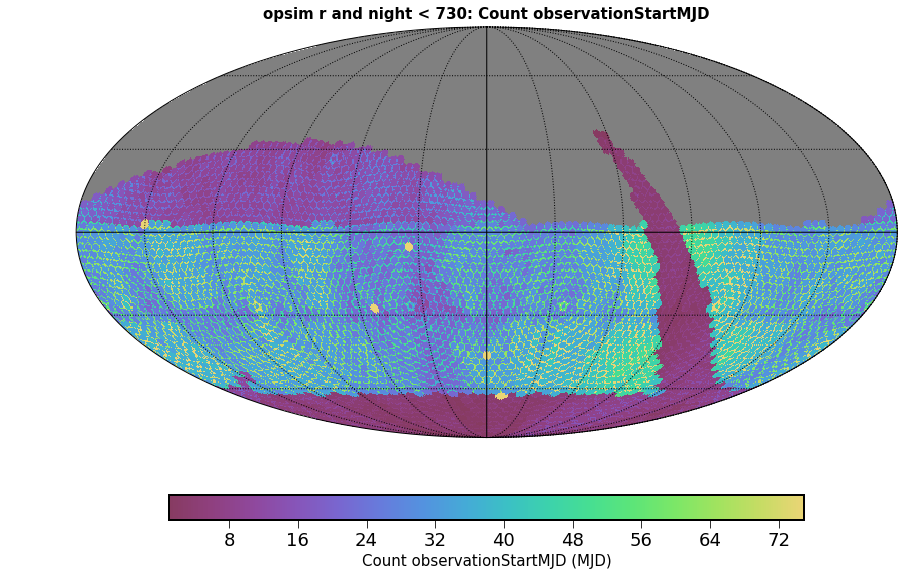

In [7]:
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['fieldDec', 'observationStartMJD', 'fieldRA']
Found 83867 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
Plotting complete.


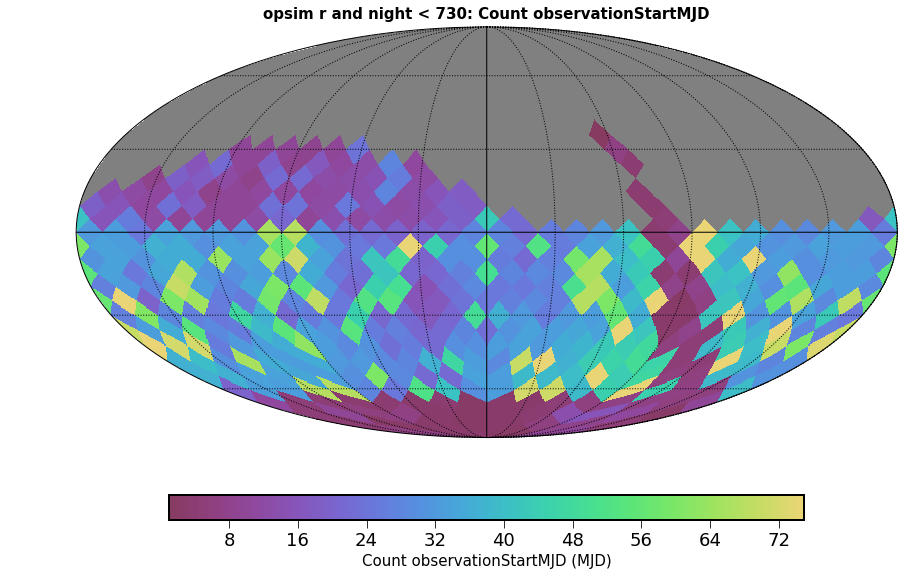

In [8]:
# Same, only now run at very low resolution
slicer = slicers.HealpixSlicer(nside=8)
bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

One thing we often want to do is run with dithered positions rather than the default to get rid of the field overlap issue

In [9]:
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA')
bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['ditheredRA', 'ditheredDec', 'observationStartMJD']
Plotting figures with "filter="r" and night < 730" constraint now.
Plotting complete.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:309: UserWarning: One or more of the columns requested from the database was not available. Skipping constraint filter="r" and night < 730
  ' Skipping constraint %s' % constraint)
/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:313: UserWarning:  This means skipping metrics ['Count observationStartMJD : r and night < 730 : HealpixSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)
/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/plots/plotHandler.py:538: UserWarning: MetricBundle (opsim_Count_observationStartMJD_r_and_nig

<Figure size 864x576 with 0 Axes>

Now let's try galactic and ecliptic coordiantes

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['fieldDec', 'observationStartMJD', 'fieldRA']
Found 83867 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
Plotting complete.


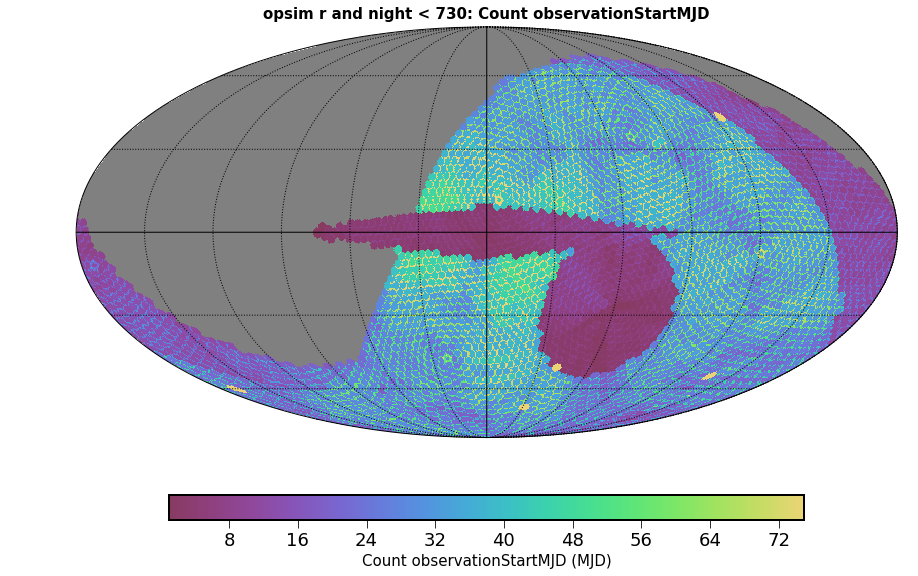

In [10]:
slicer = slicers.HealpixSlicer(latCol='galb', lonCol='gall', latLonDeg=False)
bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['fieldDec', 'observationStartMJD', 'fieldRA']
Found 83867 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
Plotting complete.


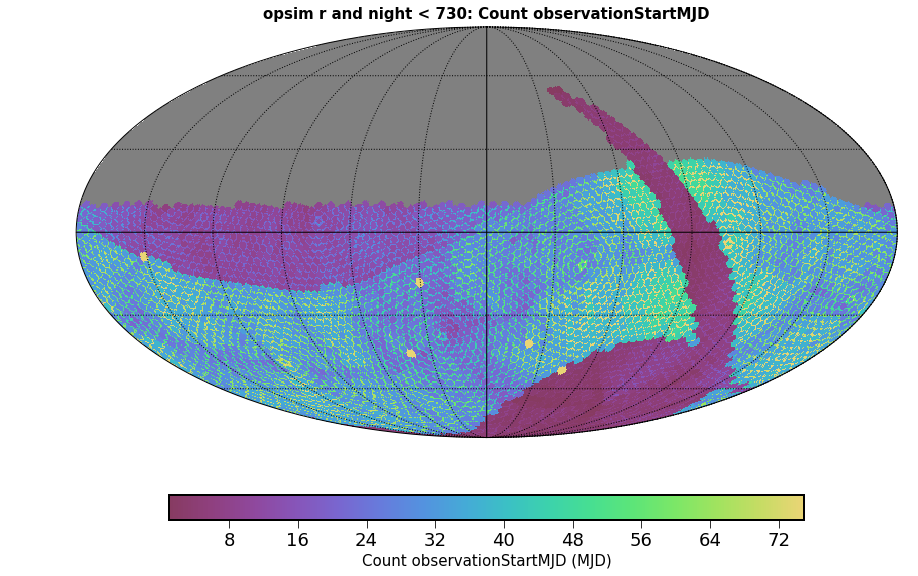

In [11]:
slicer = slicers.HealpixSlicer(latCol='eclipLat', lonCol='eclipLon')
bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

Those coordinates are getting generated automatically by stackers. If we want to move the dithered positions to galactic coordinates, we have to set that manually like thus:

One can also change things by using the rot plotting kwarg to rotate the projection. I never remember how to rotate from equatorial to galactic coords, but in theory, one could do it this way rather than using the stackers.

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['fieldDec', 'observationStartMJD', 'fieldRA']
Found 83867 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
Plotting complete.


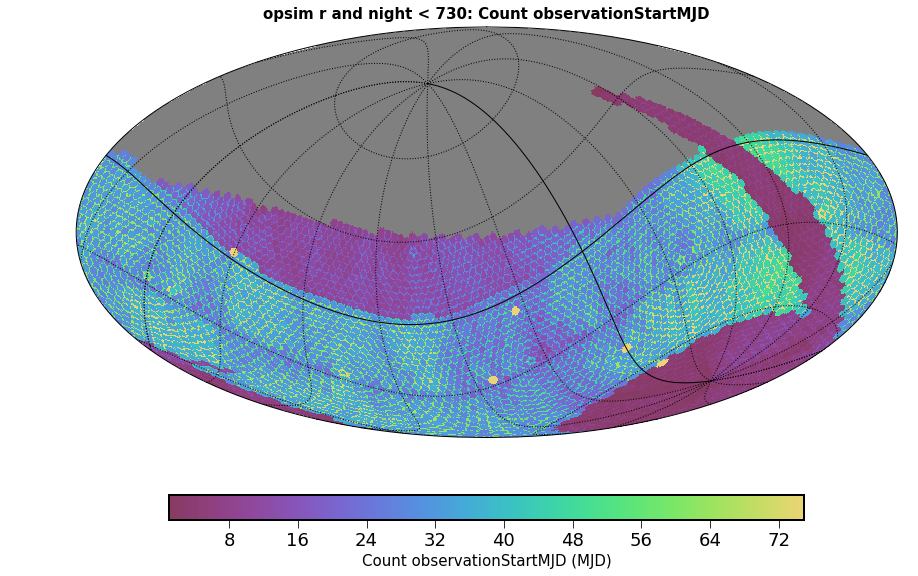

In [12]:
slicer = slicers.HealpixSlicer()  # back the the default
plotDict = {'colorMax': 75, 'rot': (35, 26, 22.)}

bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

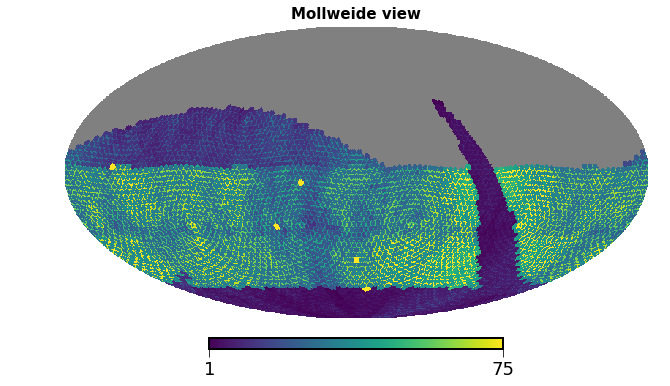

In [13]:
# Once can also use the healpy display tools:
hp.mollview(bundle.metricValues, max=75)

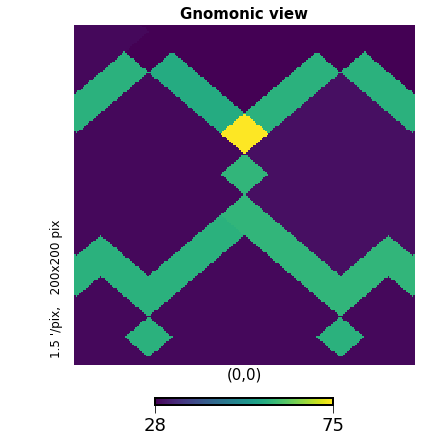

In [14]:
hp.gnomview(bundle.metricValues, max=75)

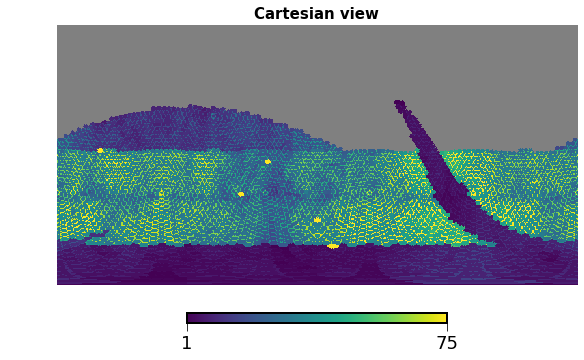

In [15]:
hp.cartview(bundle.metricValues, max=75)

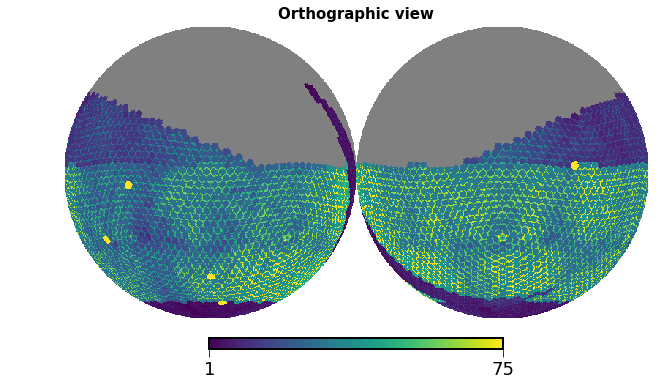

In [16]:
hp.orthview(bundle.metricValues, max=75)

And my personal favorite, looking at alt,az and using a special lambertian plotter.

NOTE: This plotter requires Basemap to run, which is not included by default in the LSST stack. To install:

`conda install basemap`

or

`pip install basemap`

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['observationStartMJD', 'azimuth', 'altitude']
Found 83867 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
Plotting complete.


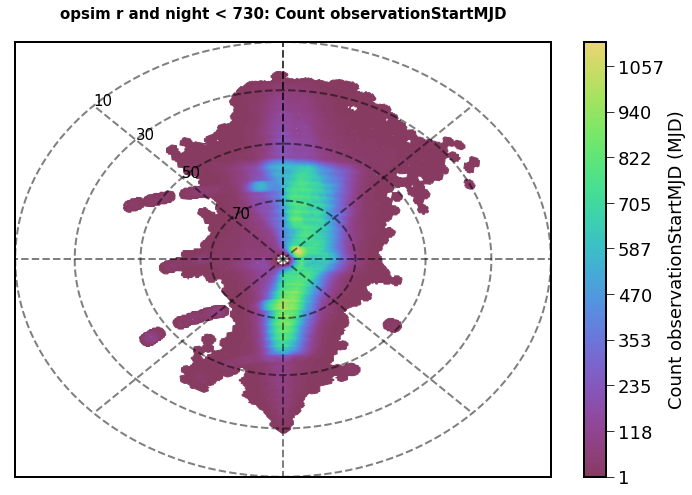

In [17]:
slicer = slicers.HealpixSlicer(latCol='altitude', lonCol='azimuth')
plotFuncs = [plots.LambertSkyMap()]
plotDict = {}

bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

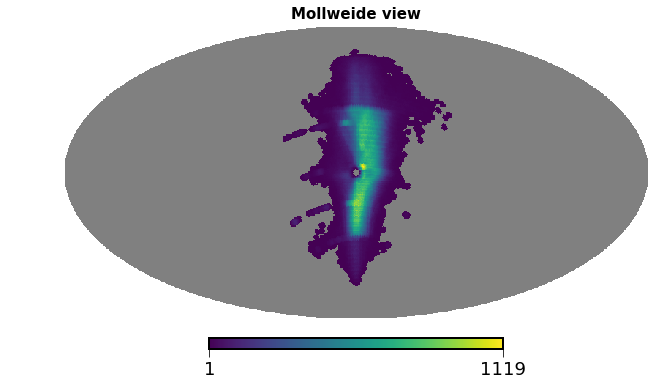

In [18]:
# and this is still a healpix array
hp.mollview(bundle.metricValues, rot= (90, 90, 90), flip ='geo')